# Jupyter Workflow for Reproduciable Research Work

In [11]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [12]:
import requests
response = requests.get(URL)
with open('Fremont.csv', 'wb') as f:
    f.write(response.content)

In [13]:
import pandas as pd
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [14]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


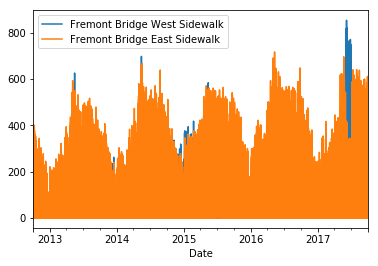

In [15]:
%matplotlib inline
data.plot()

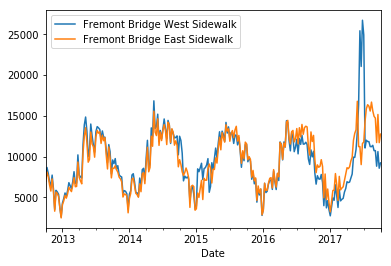

In [17]:
data.resample('w').sum().plot()

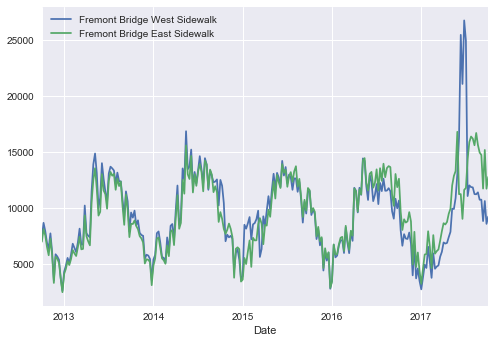

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.resample('w').sum().plot()

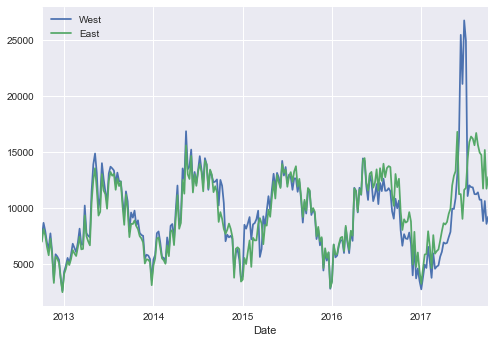

In [19]:
data.columns = ['West', 'East']
data.resample('w').sum().plot()

(0, 1059460.05)

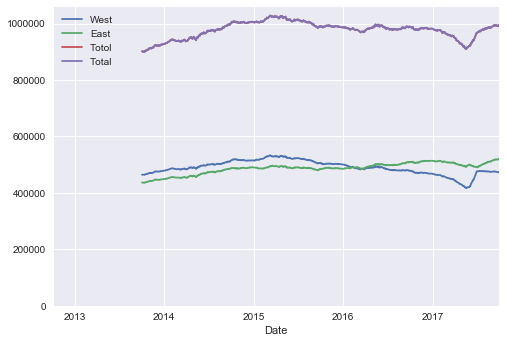

In [30]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

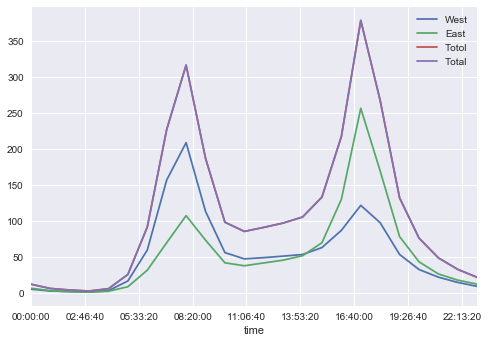

In [31]:
data.groupby(data.index.time).mean().plot()

In [32]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


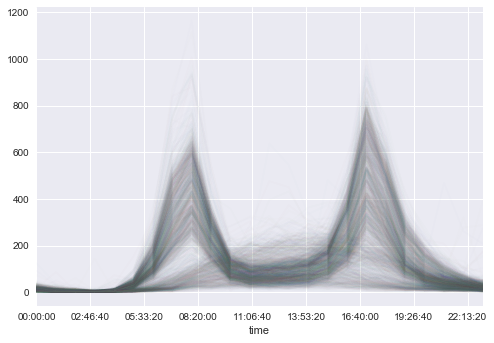

In [35]:
pivoted.plot(legend=False, alpha=0.01)